In [57]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["PINECODE_API_KEY"]=os.getenv("PINECODE_API_KEY")
os.environ["GOOGLE_API_KEY"]=os.getenv("GOOGLE_API_KEY")
os.environ["HUGGINGFACE_API_KEY"]=os.getenv("HUGGINGFACE_API_KEY")
os.environ["LANGCHAIN_API_KEY"]=os.getenv("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_PROJECT"]=os.getenv("LANGCHAIN_PROJECT")
os.environ["LANGCHAIN_TRACING_V2"]=os.getenv("LANGCHAIN_TRACING_V2")

In [58]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI()

In [59]:
llm.invoke("Hello , Dear")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 10, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BktYLEcpTsmJL0gFSqXFgJkibvT6Y', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--00bc3c5b-6632-4726-8aac-b0750a47ba89-0', usage_metadata={'input_tokens': 10, 'output_tokens': 9, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [60]:
from langchain_openai import OpenAIEmbeddings
embeddings=OpenAIEmbeddings(model="text-embedding-3-large")

In [61]:
len(embeddings.embed_query("hello"))

3072

In [62]:
#https://lilianweng.github.io/posts/2023-06-23-agent/

from langchain_community.document_loaders import WebBaseLoader

In [63]:
web_loader=WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")

In [64]:
data=web_loader.load()
data[0]

Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resul

In [65]:
data[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [66]:
data[0].page_content

'\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n|\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n    \nDate: June 23, 2023  |  Estimated Reading Time: 31 min  |  Author: Lilian Weng\n\n\n \n\n\nTable of Contents\n\n\n\nAgent System Overview\n\nComponent One: Planning\n\nTask Decomposition\n\nSelf-Reflection\n\n\nComponent Two: Memory\n\nTypes of Memory\n\nMaximum Inner Product Search (MIPS)\n\n\nComponent Three: Tool Use\n\nCase Studies\n\nScientific Discovery Agent\n\nGenerative Agents Simulation\n\nProof-of-Concept Examples\n\n\nChallenges\n\nCitation\n\nReferences\n\n\n\n\n\nBuilding agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The

In [67]:
urls=[
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"
]

docs=[WebBaseLoader(url).load() for url in urls]

In [68]:
docs_list=[item for sublist in docs for item in sublist]

In [69]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
doc_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=25)


In [70]:
docs_list
doc_splits=doc_splitter.split_documents(docs_list)

In [71]:
from langchain_community.vectorstores import Chroma
vectorstore=Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chrome",
    embedding=embeddings
    
)

In [72]:
retriever=vectorstore.as_retriever()

In [73]:
retriever.invoke("Tell me about agentic flow")

[Document(metadata={'language': 'en', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\n\nShort-term memory: I would c

In [74]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever=retriever,
    name="retriever_blog_post",
    description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.")

In [75]:
tools=[retriever_tool]
from langgraph.prebuilt import ToolNode
retriever_node=ToolNode(tools)
retriever_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'retriever_blog_post': Tool(name='retriever_blog_post', description="Search and return information about Lilian Weng blog posts on LLM agents, prompt engineering, and adversarial attacks on LLMs.You are a specialized assistant. Use the 'retriever_tool' **only** when the query explicitly relates to LangChain blog data. For all other queries, respond directly without using any tool. For simple queries like 'hi', 'hello', or 'how are you', provide a normal response.", args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x1271119e0>, retriever=VectorStoreRetriever(tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x11585bcd0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_typ

In [98]:
from typing import Annotated, Sequence, TypedDict
from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages
from langchain_core.prompts import PromptTemplate

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],add_messages]

In [77]:
llm_with_tool=llm.bind_tools(tools)
def LLM_Decision_Make(state:AgentState):
    print("----CALL LLM_DECISION_MAKE----")
    message=state["messages"]
    last_message=message[-1]
    question=last_message.content
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}


In [78]:
def rewriter(state:AgentState):
    print("----TRANSFORM QUERY----")
    message=state["messages"]
    
    question=message[0].content
    
    input= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]

    response=llm.invoke(input)
    
    return {"messages": [response]}

In [79]:
def generator(state:AgentState):
    print("----RAG OUTPUT GENERATE----")
    
    message=state["messages"]
    question=message[0].content
    
    last_message = message[-1]
    docs = last_message.content
    
    prompt=hub.pull("rlm/rag-prompt")
    
    rag_chain=prompt | llm
    
    response=rag_chain.invoke({"context": docs, "question": question})
    
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [94]:
from langchain_core.pydantic_v1 import BaseModel,Field
class grade(BaseModel):
    binary_score:str=Field(description="Relvance score 'yes' or 'no'")

In [95]:
from typing import Literal
def grade_documents(state:AgentState)->Literal["Output Generator", "Query Rewriter"]:
    print("----CALLING GRADE FOR CHECKING RELEVANCY----")
    llm_with_structure_op=llm.with_structured_output(grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
     
    chain=prompt|llm_with_structure_op
     
     
    message=state['messages']
    
    last_message = message[-1]
    
    question = message[0].content
    
    docs = last_message.content
    
    scored_result=chain.invoke({"question": question, "context": docs})
    
    score=scored_result.binary_score
     
    if score=="yes":
        print("----DECISION: DOCS ARE RELEVANT----")
        return "generator"
    else:
        print("----DECISION: DOCS ARE NOT RELEVANT----")
        return "rewriter"

In [96]:
from langchain import hub
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [91]:
from langgraph.graph import END, START, StateGraph
from langgraph.prebuilt import tools_condition
agentic_workflow=StateGraph(AgentState)

agentic_workflow.add_node("LLM Decision Maker",LLM_Decision_Make)
agentic_workflow.add_node("Vector Retriever", retriever_node)
agentic_workflow.add_node("Output Generator",generator)
agentic_workflow.add_node("Query Rewriter",rewriter)

agentic_workflow.add_conditional_edges("LLM Decision Maker",
                                       tools_condition,
                                       {
                                           "tools":"Vector Retriever",
                                           END:END
                                       })

agentic_workflow.add_edge(START,"LLM Decision Maker")
agentic_workflow.add_conditional_edges("Vector Retriever",
                                       grade_documents,
                                       {
                                           "generator":"Output Generator",
                                           "rewriter":"Query Rewriter"
                                       })
agentic_workflow.add_edge("Query Rewriter","LLM Decision Maker")
agentic_workflow.add_edge("Output Generator",END)

agentic_app=agentic_workflow.compile()


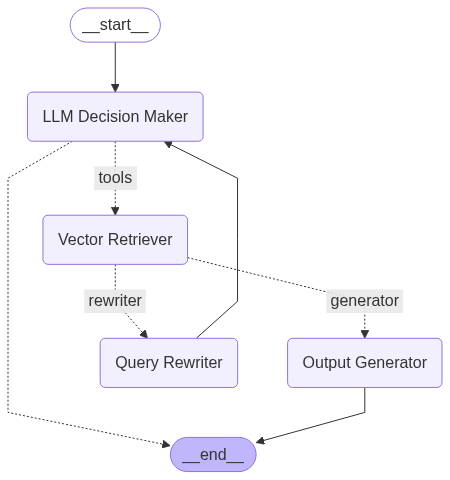

In [92]:
from IPython.display import Image, display
display(Image(agentic_app.get_graph(xray=True).draw_mermaid_png()))

In [84]:
import warnings
warnings.filterwarnings("ignore")

In [85]:
question="can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?"
agentic_app.invoke({"messages":[question]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='can you explain me what is a task decomposition and why Chain of thought (CoT; Wei et al. 2022) has become a standard prompting technique for enhancing model performance on complex tasks?', additional_kwargs={}, response_metadata={}, id='60f2d19a-65a4-492f-aea5-d202ea1da94a'),
  AIMessage(content="Task decomposition is a problem-solving strategy where a complex task is broken down into smaller, more manageable subtasks. Each subtask is then solved independently, and the solutions are combined to achieve the overall goal of the complex task. Task decomposition helps in simplifying complex problems, making them easier to solve and understand.\n\nThe Chain of Thought (CoT) technique, introduced by Wei et al. in 2022, has become a standard prompting technique for enhancing model performance on complex tasks for several reasons:\n\n1. **Hierarchical Structure**: CoT prompts are designed in a hierarchical structure, where each prompt leads the model throug

In [86]:
question="autonomous?"
agentic_app.invoke({"messages":[question]})

----CALL LLM_DECISION_MAKE----


{'messages': [HumanMessage(content='autonomous?', additional_kwargs={}, response_metadata={}, id='f841f70a-da7c-4958-8492-4b654e2ebe1f'),
  AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 141, 'total_tokens': 151, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BktZF0j7pqsj4DY9256GoIzCOhqdA', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--37f5d2bc-432d-4d68-8385-de3d2288e370-0', usage_metadata={'input_tokens': 141, 'output_tokens': 10, 'total_tokens': 151, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [99]:
agentic_app.invoke({"messages":["what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?"]})

----CALL LLM_DECISION_MAKE----
----CALLING GRADE FOR CHECKING RELEVANCY----
----DECISION: DOCS ARE RELEVANT----
----RAG OUTPUT GENERATE----
this is my response:content='LLM Powered Autonomous Agents use Prompt Engineering to communicate with LLMs for desired outcomes without changing the model weights. It requires experimentation and heuristics to achieve effective results. NLP, language models, and agents are involved in this process.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 49, 'prompt_tokens': 329, 'total_tokens': 378, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BktesOAtJJKxKjXkZHM2j386IRtHe', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='run--0e485aa7-82d0-4c71-8806

{'messages': [HumanMessage(content='what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?', additional_kwargs={}, response_metadata={}, id='be170fcb-6376-4147-b906-865a93266fc1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_poZY1i7fUeJnJUTtKDvFKp3O', 'function': {'arguments': '{"query": "LLM Powered Autonomous Agents"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_UVjyycDVY1Zn59ff5sQuh8hO', 'function': {'arguments': '{"query": "Planning and Reflection in LLMs"}', 'name': 'retriever_blog_post'}, 'type': 'function'}, {'id': 'call_BUr3f0wd4CXIrnhPvxof4WaV', 'function': {'arguments': '{"query": "Prompt Engineering in LLMs"}', 'name': 'retriever_blog_post'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 81, 'prompt_tokens': 163, 'total_tokens': 244, 'completion_tokens_details': {'accepted_prediction_tokens'